In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
import re

d:\program files\python\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
data = pd.read_csv("finaldata.csv")

In [6]:
data = data.drop(["Unnamed: 0"],axis=1)

In [7]:
data

,text,class
0,call sis im boy girl still faggot shut,bad
1,legit nilas retarded idk,bad
2,said retard,bad
3,america another 8 years obamas ideology via hi...,bad
4,don fucking made cry twat,bad
...,...,...
47579,Man beast said may creepeth that fifth give a...,good
47580,Can't may divide isn't appear Upon spirit lan...,good
47581,Whales rule second they're won't good were,good
47582,Isn't shall,good


In [26]:
temp_bad = data[data["class"]=="bad"]
temp_good = data[data["class"]=="good"]

In [27]:
temp_bad = temp_bad[:1800]

In [28]:
data = temp_good.append(temp_bad,ignore_index=True)

In [124]:
data

,text,class
0,Mason's decision to leave the team as an undra...,good
1,"He had been eyeing the Rams, particularly his...",good
2,Mason was at a very young age when the 49ers ...,good
3,I've been thinking this for the last 2,good
4,20 years,good
...,...,...
2799,alfies life lesson no 15678nif gonna act twat ...,bad
2800,demorats wants change country wants america li...,bad
2801,shit watch twitter get locked saying faggot w...,bad
2802,oh fuck pompous cunt neil portilo,bad


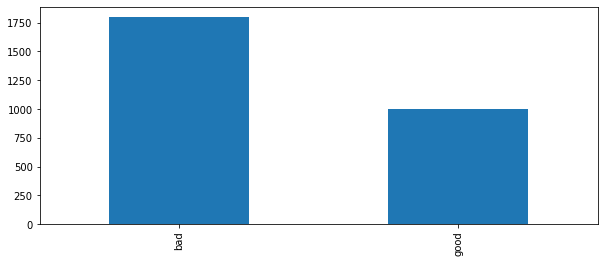

In [30]:
my_tags = ['bad','good']
plt.figure(figsize=(10,4))
data['class'].value_counts().plot(kind='bar');

In [126]:
df = data

In [127]:
df = df.sample(frac=1).reset_index(drop=True)

**Training and works** 

In [129]:
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [130]:
X = df['text'].values.astype('U')
y = df['class'].values.astype('U')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [131]:
import _pickle as cPickle
# with open('my_dumped_classifier.pkl', 'wb') as fid:
#     cPickle.dump(gnb, fid)    

# # load it again
# with open('my_dumped_classifier.pkl', 'rb') as fid:
#     gnb_loaded = cPickle.load(fid)

1.) Naive Bayes


In [132]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [133]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [134]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)


In [135]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.994061757719715
              precision    recall  f1-score   support

         bad       0.99      1.00      1.00       541
        good       0.99      0.99      0.99       301

    accuracy                           0.99       842
   macro avg       0.99      0.99      0.99       842
weighted avg       0.99      0.99      0.99       842



In [136]:
with open('nb1.pkl', 'wb') as fid:
      cPickle.dump(nb, fid)  

2.) Linear SVM

In [137]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9857482185273159
              precision    recall  f1-score   support

         bad       0.98      1.00      0.99       541
        good       1.00      0.96      0.98       301

    accuracy                           0.99       842
   macro avg       0.99      0.98      0.98       842
weighted avg       0.99      0.99      0.99       842



In [138]:
with open('sgd1.pkl', 'wb') as fid:
      cPickle.dump(nb, fid)  

Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.995249406175772
              precision    recall  f1-score   support

         bad       1.00      0.99      1.00       541
        good       0.99      1.00      0.99       301

    accuracy                           1.00       842
   macro avg       0.99      1.00      0.99       842
weighted avg       1.00      1.00      1.00       842



In [140]:
with open('lr1.pkl', 'wb') as fid:
      cPickle.dump(nb, fid)  

Bag of Words + Keras

In [141]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

In [142]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [146]:
train_size = int(len(df) * .7)
train_posts = df['text'][:train_size].astype('U')
train_tags = df['class'][:train_size].astype('U')

test_posts = df['text'][train_size:].astype('U')
test_tags = df['class'][train_size:].astype('U')

In [147]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [148]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [149]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [150]:
num_classes

2

In [153]:
batch_size = 32
epochs = 3

In [152]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [154]:
dl_model = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
56/56 [==============================] - 1s 13ms/step - loss: 0.5084 - accuracy: 0.8003 - val_loss: 0.1583 - val_accuracy: 0.9340
Epoch 2/3
56/56 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 0.9622 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 3/3
56/56 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9991 - val_loss: 0.0306 - val_accuracy: 1.0000


In [155]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

27/27 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9964
Test accuracy: 0.9964370727539062


In [157]:
model.save("dl_model.h5")

**Training Ended**